<a href="https://colab.research.google.com/github/baaaaamji/asian-hate-crime/blob/main/%EC%95%A0%ED%8B%80%EB%9E%9C%ED%83%80_%EC%B4%9D%EA%B2%A9%EC%82%AC%EA%B1%B4_asian_hate_%ED%82%A4%EC%9B%8C%EB%93%9C_%EB%B6%84%EC%84%9D_1st_period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Textblob &> /dev/null
!pip install -U tomotopy &> /dev/null
!pip install -U pyldavis==2.1.2 &> /dev/null
!pip install -U gensim &> /dev/null

In [ ]:
import pandas as pd
import re
import pprint as pp

import nltk
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob, Word

nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm

pd.options.display.max_colwidth = -1

%matplotlib inline 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/Innovation2021/LDA/NYT1ST.csv', encoding='utf-8')

DF.head()

Content  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
print(len(DF))

CONTENT = DF['Content']

53


In [ ]:
POS = ['NN','NNP']

stop_words = stopwords.words('english')
stops = ['percent', 'time', 'group', 'rate', 'place', 'number', 'thing', 'dollar', 'decade', 'area', 'point', 'example', 'said', 'line', 'step', 'side', 'wednesday', 'april', 'year', 'Year', 'com','day','month','other']
stop_words.extend(stops)
stop_words = set(stop_words)

def TB_lemmatization(texts):
  lemma_all = []
  words = []
  for doc in texts:
        doc = " ".join([Word(word).lemmatize("n") for word in doc.split()])
        doc = TextBlob(doc)  

        for word, tag in doc.tags:
            if(len(word) < 2 or word.lower() in stop_words):
                continue
            if tag in POS:
                words.append(word)
        
        words = " ".join(words).lower()
        lemma_all.append(words)
        words = []  
        
        return lemma_all

CONTENT_PREP = TB_lemmatization(DF['Content'])             

In [ ]:
CONTENT_PREP[0]

'man hollywood reed hastings netflix godzilla entertainment world course hollywood. slender mr. hastings mystery industry cipher hollywood mr. hastings star san vicente bungalows bellow pool hotel du cap sundance line.he delivery system company force capital drama mr. hastings drama infrastructure own.studio boss agent parachute disney covid havoc theme park movie theater metoo plate netflix ha sun clubby king r.i.p. louis b. mayer.ben smith new york times columnist obit hollywood janice min co-president hollywood reporter netflix pandemic viewer broadcast cable. ascendance netflix barry diller hollywood moguls hegemony industry. mr. diller gravitate hollywood status glamour mr. hastings rarest creature game violin virtuoso. math wonk pastime thinking man marine corps peace corps math swaziland render hollywood irrelevant mr mother boston debutante social register family lawyer nixon administration world society child reed elite overlord land artifice hate artifice playacting. probably

Adding 'Allwords' as New Variable into Data

In [ ]:
Allwords = DF['Allwords']

DF.head()

Content  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Adding 'Allwords' as New Variable into Data

In [ ]:
DF.to_csv('/content/drive/MyDrive/Innovation2021/LDA/NYT1ST2.csv', encoding = 'utf-8-sig', 
          index_label = False, index = False)

In [ ]:
vec = CountVectorizer().fit(CONTENT_PREP)
bow = vec.transform(CONTENT_PREP)

sum_words = bow.sum(axis=0)
sum_words.shape[1]

571

In [ ]:
words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
words_frequ = sorted(words_freq, key = lambda x: x[1], reverse=True)
for word, freq in words_freq[0:100]:
  print(word, freq)

man 2
hollywood 14
reed 4
hastings 29
netflix 36
godzilla 1
entertainment 1
world 4
course 1
slender 1
mr 41
mystery 1
industry 2
cipher 1
star 3
san 1
vicente 1
bungalows 1
bellow 1
pool 1
hotel 1
du 1
cap 1
sundance 1
line 1
he 4
delivery 1
system 1
company 12
force 1
capital 1
drama 3
infrastructure 1
own 1
studio 1
boss 2
agent 1
parachute 1
disney 4
covid 2
havoc 1
theme 1
park 1
movie 3
theater 2
metoo 1
plate 1
ha 4
sun 1
clubby 1
king 1
louis 1
mayer 1
ben 1
smith 1
new 1
york 1
times 1
columnist 1
obit 1
janice 1
min 3
co 2
president 2
reporter 1
pandemic 3
viewer 1
broadcast 1
cable 1
ascendance 1
barry 1
diller 2
moguls 1
hegemony 1
gravitate 1
status 1
glamour 1
rarest 1
creature 1
game 2
violin 1
virtuoso 1
math 2
wonk 1
pastime 1
thinking 1
marine 1
corps 2
peace 1
swaziland 1
render 1
irrelevant 1
mother 2
boston 1
debutante 1
social 1
register 1
family 2
lawyer 1
nixon 3


In [ ]:
import pandas as pd
import re
import numpy as np
import tomotopy as tp
import collections

import gensim
import pyLDAvis

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecat

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/Innovation2021/LDA/NYT1ST.csv', encoding='utf-8')

DF.head()

Content  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
def get_coherence(model, coherence=None, topn=None, processes=None):

  topics = []
  for k in range(model.k):
    word_probs = model.get_topic_words(k, topn)
    topics.append([word for word, prob in word_probs])
  
  texts = []
  corpus =[]
  for doc in model.docs:
    words = [model.vocabs[token_id] for token_id in doc.words]
    texts.append(words)
    freqs = list(collections.Counter(doc.words).items())
    corpus.append(freqs)

  id2word = dict(enumerate(model.vocabs))
  dictionary = gensim.corpora.dictionary.Dictionary.from_corpus(corpus, id2word)

  cm = gensim.models.coherencemodel.CoherenceModel(
      topics=topics,
      texts=texts,
      corpus=corpus,
      dictionary=dictionary,
      coherence=coherence,
      topn=topn,
      processes=processes,
  )

  return cm.get_coherence()

In [ ]:
def compute_coherence_values(doc, start, limit, step):
    for i in range(start, limit, step):
        mdl = tp.LDAModel(k=i)
        for text in doc:
            token = text.strip().split()
            if token:
                mdl.add_doc(token)

        mdl.train(iter=100, workers=0)
        coherence_value = get_coherence(mdl, coherence='c_v', topn=10, processes=10)

        print('Topic: {}\tLog-likelihood: {}\tPerplexity: {}\tCoherence: {}'\
        .format(
            i,
            mdl.ll_per_word,
            mdl.perplexity,
            coherence_value
            )
        )
        coherence_values.append(coherence_value) 
        perplexities.append(mdl.perplexity)


In [ ]:
DF['Allwords'].replace('', np.nan, inplace=True)
DF.dropna(subset=['Allwords'], inplace=True)

limit = 50
start = 1;
step = 2;

coherence_values = []
perplexities = []

compute_coherence_values(DF['Allwords'], start, limit, step)

Topic: 1	Log-likelihood: -7.735638459469237	Perplexity: 2288.469332876403	Coherence: 0.28592892600380937
Topic: 3	Log-likelihood: -7.679315741286516	Perplexity: 2163.139118539947	Coherence: 0.37584332065894976
Topic: 5	Log-likelihood: -7.599578884693826	Perplexity: 1997.35460138122	Coherence: 0.4728124023860726
Topic: 7	Log-likelihood: -7.559469354409162	Perplexity: 1918.8270260685954	Coherence: 0.4056772921743865
Topic: 9	Log-likelihood: -7.513605245392127	Perplexity: 1832.8093734265767	Coherence: 0.44706575966171513
Topic: 11	Log-likelihood: -7.395797461133493	Perplexity: 1629.1235684601597	Coherence: 0.4980471791554462
Topic: 13	Log-likelihood: -7.43226465831657	Perplexity: 1689.6296777545404	Coherence: 0.4844332056063533
Topic: 15	Log-likelihood: -7.37723991052017	Perplexity: 1599.1698191172977	Coherence: 0.4888007539437072
Topic: 17	Log-likelihood: -7.3823247042430316	Perplexity: 1607.3219762294104	Coherence: 0.4977028820644397
Topic: 19	Log-likelihood: -7.345583365655375	Perplexi

In [ ]:
x = range(start, limit, step)

mdl_check = pd.DataFrame(list(zip(x, perplexities, coherence_values)), columns=['Num Topics', 'Perplexity', 'Coherence'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6986acdad0>,
      dtype=object)

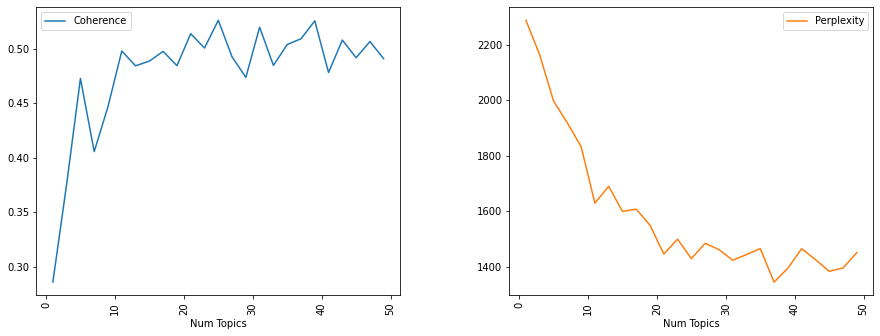

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2) 

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5)

pd.pivot_table(mdl_check, values=["Perplexity", "Coherence"],index="Num Topics")\
    .plot(kind='line', rot=90, ax=ax, subplots=True) 

In [ ]:
mdl = tp.LDAModel(k=15)

for text in DF['Allwords']:
    token = text.strip().split()
    if token:
        mdl.add_doc(token)
mdl.train(iter=100, workers=0)

for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))

Top 10 words of topic #0
[('time', 0.04366331920027733), ('parent', 0.026512935757637024), ('state', 0.025733372196555138), ('question', 0.02261512167751789), ('country', 0.021835558116436005), ('other', 0.019496869295835495), ('report', 0.018717307597398758), ('career', 0.018717307597398758), ('work', 0.01481949258595705), ('self', 0.01481949258595705)]
Top 10 words of topic #1
[('story', 0.04763686656951904), ('life', 0.03998230770230293), ('book', 0.03913180157542229), ('time', 0.03147724270820618), ('girl', 0.03062673658132553), ('world', 0.028075216338038445), ('person', 0.018719647079706192), ('people', 0.015317621640861034), ('problem', 0.015317621640861034), ('heart', 0.014467115513980389)]
Top 10 words of topic #2
[('year', 0.03163420781493187), ('lot', 0.02768092043697834), ('time', 0.02609960548579693), ('thing', 0.025308948010206223), ('friend', 0.02372763492166996), ('decision', 0.01819303072988987), ('family', 0.015030400827527046), ('success', 0.013449085876345634), ('jo

In [ ]:
topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq

In [ ]:
prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency,
    mds='mmds'
)

pyLDAvis.display(prepared_data)